In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Get the dataset

In [6]:
columns_names = ["user_id","item_id","rating","timestamp"]
df = pd.read_csv("./Downloads/ml-100k/u.data",sep='\t',names = columns_names)

In [7]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
df.shape

(100000, 4)

In [10]:
df['user_id'].nunique() #user id is for user

943

In [11]:
df['item_id'].nunique() #item id is for movie id

1682

In [18]:
movies_title = pd.read_csv("./Downloads/ml-100k/u.item",sep="\|",header=None)

In [19]:
movies_title.shape

(1682, 24)

In [20]:
movies_title = movies_title[[0,1]]

In [21]:
movies_title.shape

(1682, 2)

In [22]:
movies_title.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [23]:
movies_title.columns = ['item_id','title']

In [24]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [25]:
df = pd.merge(df,movies_title,on = "item_id")

In [26]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


### Exploratory Data Analysis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [30]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [31]:
df.groupby('title').count()['rating'].sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

### Lets create a data frame

In [32]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [33]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


### Create another data frame which consists of count

In [34]:
ratings['no of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [35]:
ratings

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [37]:
ratings.sort_values(by = 'rating',ascending=False)

,rating,no of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


### We can plot histogram to check the no of ratings for each movie

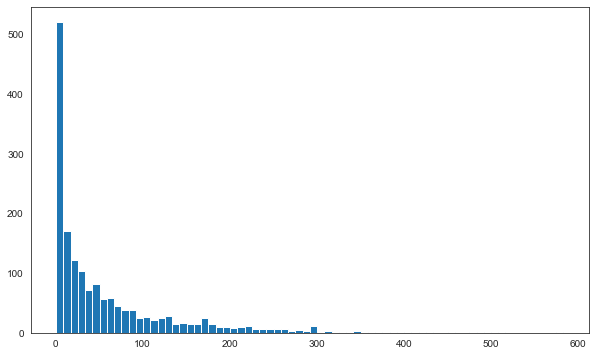

In [38]:
plt.figure(figsize=(10,6))
plt.hist(ratings['no of ratings'],bins = 70)
plt.show()

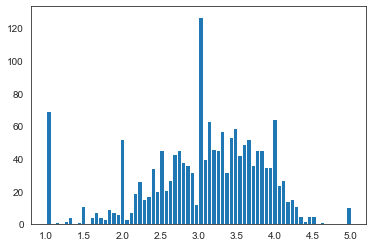

In [40]:
plt.hist(ratings['rating'],bins=70)
plt.show()

### Create a jointplot

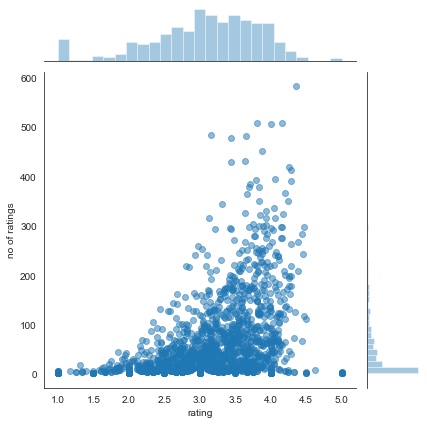

In [41]:
sns.jointplot(x = 'rating',y = 'no of ratings',data = ratings, alpha = 0.5)

### Create a recommender system

In [42]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


### Create a matrix which has user id in the rows , followed by columns which contain movie name and the value is filled by the rating. For this we will use pivot table from pandas.

In [43]:
moviemat = df.pivot_table(index='user_id',columns = 'title', values = 'rating')

In [44]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
ratings.sort_values('no of ratings',ascending = False).head()

,rating,no of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


### Lets try to see for star wars

In [48]:
starwars_user_ratings = moviemat['Star Wars (1977)']

In [49]:
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

### Let us try to correlate the star wars movie with all other movies

In [51]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [52]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [55]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns = ['Correlation'])

In [56]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


### We need to drop the NA Values

In [57]:
corr_starwars.dropna(inplace=True)

In [59]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [62]:
corr_starwars.sort_values("Correlation",ascending = False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


### We will keep a threshold , of no of ratings >=100 as those ratingsa re only valuable for the correaltion. It doesnt matter if 2 people give 5 * Ratings as the no of ratings is less. So as seen from the 1st graph , we will keep a threshold of no of ratings.

In [63]:
ratings

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [64]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [66]:
corr_starwars = corr_starwars.join(ratings['no of ratings'])

In [67]:
corr_starwars.head(10)

,Correlation,no of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


### No of ratings > 100

In [77]:
corr_starwars[corr_starwars['no of ratings'] > 100].sort_values('Correlation',ascending = False)

,Correlation,no of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


### Now we have highest correlation with highest no of ratings

### Predict Movies

In [81]:
def predict_movies(movie_name):
    #take the movie user rating from the matrix
    movie_user_rating = moviemat[movie_name]
    #find all movies similar to this movie
    similar_to_movie = moviemat.corrwith(movie_user_rating)
    # make a data frame and drop NA Values
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    # join it with no of ratings and sort so as to get the highest correlation with 
    #highest no of ratings
    corr_movie = corr_movie.join(ratings['no of ratings'])
    predictions = corr_movie[corr_movie['no of ratings'] > 100].sort_values('Correlation',ascending = False)
    
    return predictions